In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('A04_6.csv')
data

,fz,temp_max,bc_2,ms,jgl,zs
0,17.823529,501024808,0,0,580.647059,1.941176
1,19.554839,501024805,0,1,301.445161,0.503226
2,18.838150,501024807,0,2,235.994220,7.526012
3,18.456140,501024809,0,3,319.818714,3.859649
4,18.339181,501024809,0,4,381.350877,3.140351
5,18.197674,501024809,0,5,272.267442,0.744186
6,18.751445,501024809,0,6,320.421965,0.312139
7,19.286550,501024807,0,7,236.695906,0.304094
8,19.432749,501024808,0,8,307.865497,7.403509
9,18.695906,501024806,-5,9,464.005848,3.432749


In [2]:
from sklearn.model_selection import train_test_split
np.random.seed(21)
target = data['fz']
data.drop('fz', axis=1, inplace=True)
train_data, val_data, train_y, val_y = train_test_split(
    data, target, train_size=0.8, random_state=21
)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def simple_linear_model(train_data, train_y, val_data, val_y, input_feature):
    reg = LinearRegression()
    reg.fit(train_data.as_matrix(columns=[input_feature]), train_y)
    RMSE = mean_squared_error(
        val_y, reg.predict(val_data.as_matrix(columns=[input_feature]))
    ) ** 0.5
    return RMSE

In [4]:
estimate_result = pd.DataFrame(columns=['feature', 'Val_RMSE'])

np.random.seed(21)

for feature in train_data.columns:
    RMSE = simple_linear_model(train_data, train_y, val_data, val_y, feature)
    estimate_result = estimate_result.append({'feature': feature, 'Val_RMSE': RMSE}, ignore_index=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in

In [5]:
estimate_result.sort_values(by='Val_RMSE').head(5)

,feature,Val_RMSE
0,temp_max,1.311595
3,jgl,1.406998
1,bc_2,1.413286
4,zs,1.413399
2,ms,1.415167


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LogisticRegression
#from sklearn import svm

np.random.seed(21)
#random_state=np.random.RandomState(0)
def regression_model(reg, train_data, train_y, val_data, val_y, input_feature):
    reg.fit(train_data.as_matrix(columns=input_feature), train_y)
    RMSE = mean_squared_error(
        val_y, reg.predict(val_data.as_matrix(columns=input_feature))
    ) ** 0.5
    return reg, RMSE
#svm=svm.SVC(kernel='linear',probability=True,random_state=random_state)
#lr = LogisticRegression()
ridge = Ridge()
dt_gre = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
ridge, RMSE = regression_model(ridge, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for ridge_regression is %s' % RMSE)
dt_gre, RMSE = regression_model(dt_gre, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for DecisionTreeRegressor is %s' % RMSE)
rf_reg, RMSE = regression_model(rf_reg, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for RandomForestRegressor is %s' % RMSE)
#lr, RMSE = regression_model(lr, train_data, train_y, val_data, val_y, train_data.columns)
#print('RMSE for LogisticRegression is %s' % RMSE)
#svm, RMSE = regression_model(svm, train_data, train_y, val_data, val_y, train_data.columns)
#print('RMSE for svm is %s' % RMSE)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.p

RMSE for ridge_regression is 1.3119174881289484
RMSE for DecisionTreeRegressor is 1.8918403921043798
RMSE for RandomForestRegressor is 1.4388431166792501


D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [8]:
from sklearn.model_selection import GridSearchCV

np.random.seed(21)

tune_params = {'n_estimators': [10, 20 ,30],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 30, 50]}

rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg, param_grid=tune_params, verbose=1, n_jobs = -1)
grid_search.fit(train_data, train_y)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    6.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [9]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}

In [10]:
np.random.seed(21)

rf_reg_2 = RandomForestRegressor(n_estimators=30, max_features='auto', max_depth=10)

rf_reg_2, RMSE = regression_model(rf_reg_2, train_data, train_y, val_data, val_y, train_data.columns)
print('RMSE for RandomForestRegressor is %s' % RMSE)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


RMSE for RandomForestRegressor is 1.307789506011173


D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [11]:
test=pd.read_csv('A04_6_test.csv')
test

,fz,temp_max,bc_2,ms,jgl,zs
0,18.097222,500959280,-14,51,318.416667,0.680556
1,17.986301,500959279,-14,52,282.917808,1.575342
2,21.847222,500959282,-14,53,269.847222,10.652778
3,17.575342,500959282,-14,54,273.013699,7.123288
4,17.547945,500959280,-14,55,498.643836,6.589041
5,18.082192,500959279,-14,56,372.794521,7.438356
6,23.569444,500959280,-14,57,346.444444,1.041667
7,17.726027,500959279,-14,58,271.068493,14.506849
8,17.444444,500959280,-17,59,516.027778,5.319444
9,19.708333,500959278,-17,60,271.541667,5.972222


In [12]:
test_y=test['fz']
test.drop(['fz'],axis=1,inplace=True)
test

,temp_max,bc_2,ms,jgl,zs
0,500959280,-14,51,318.416667,0.680556
1,500959279,-14,52,282.917808,1.575342
2,500959282,-14,53,269.847222,10.652778
3,500959282,-14,54,273.013699,7.123288
4,500959280,-14,55,498.643836,6.589041
5,500959279,-14,56,372.794521,7.438356
6,500959280,-14,57,346.444444,1.041667
7,500959279,-14,58,271.068493,14.506849
8,500959280,-17,59,516.027778,5.319444
9,500959278,-17,60,271.541667,5.972222


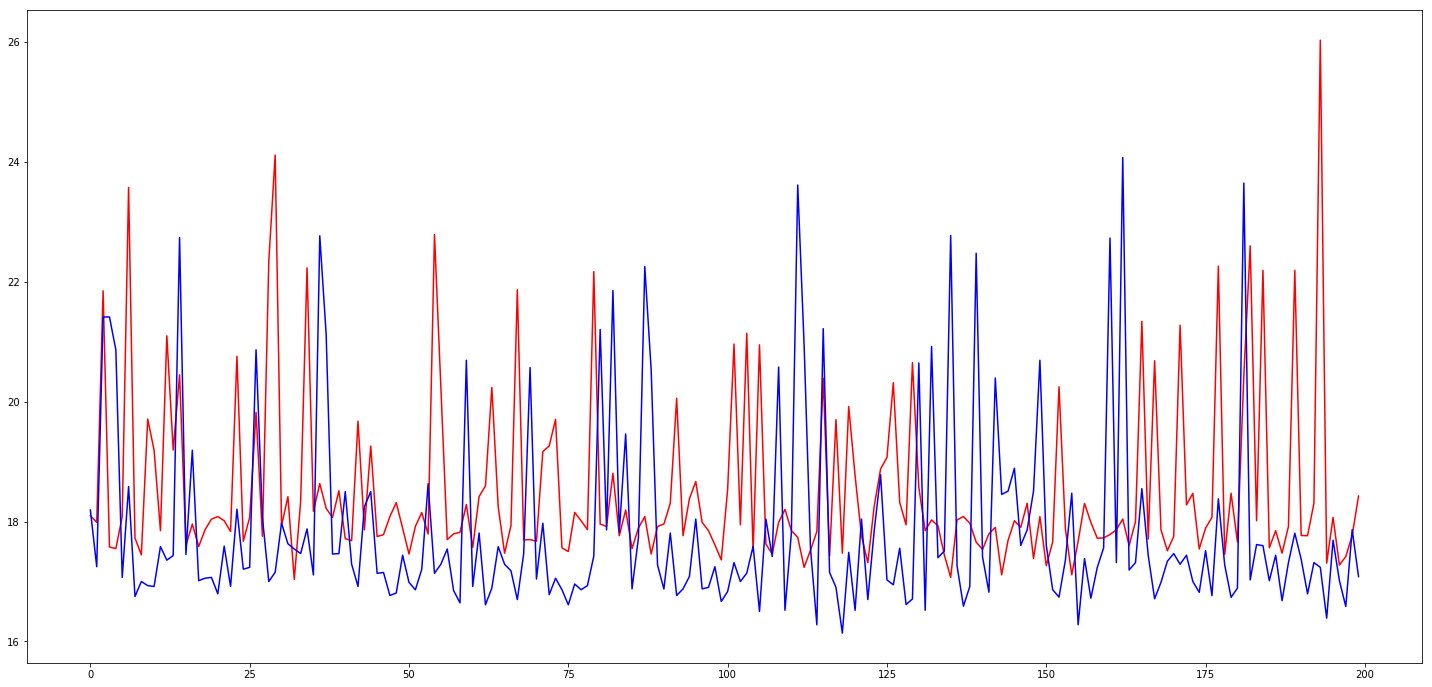

In [13]:
plt.figure(figsize=(25,12))
plt.plot(test_y,c='red')
plt.plot(dt_gre.predict(test),c='blue')
plt.show()

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

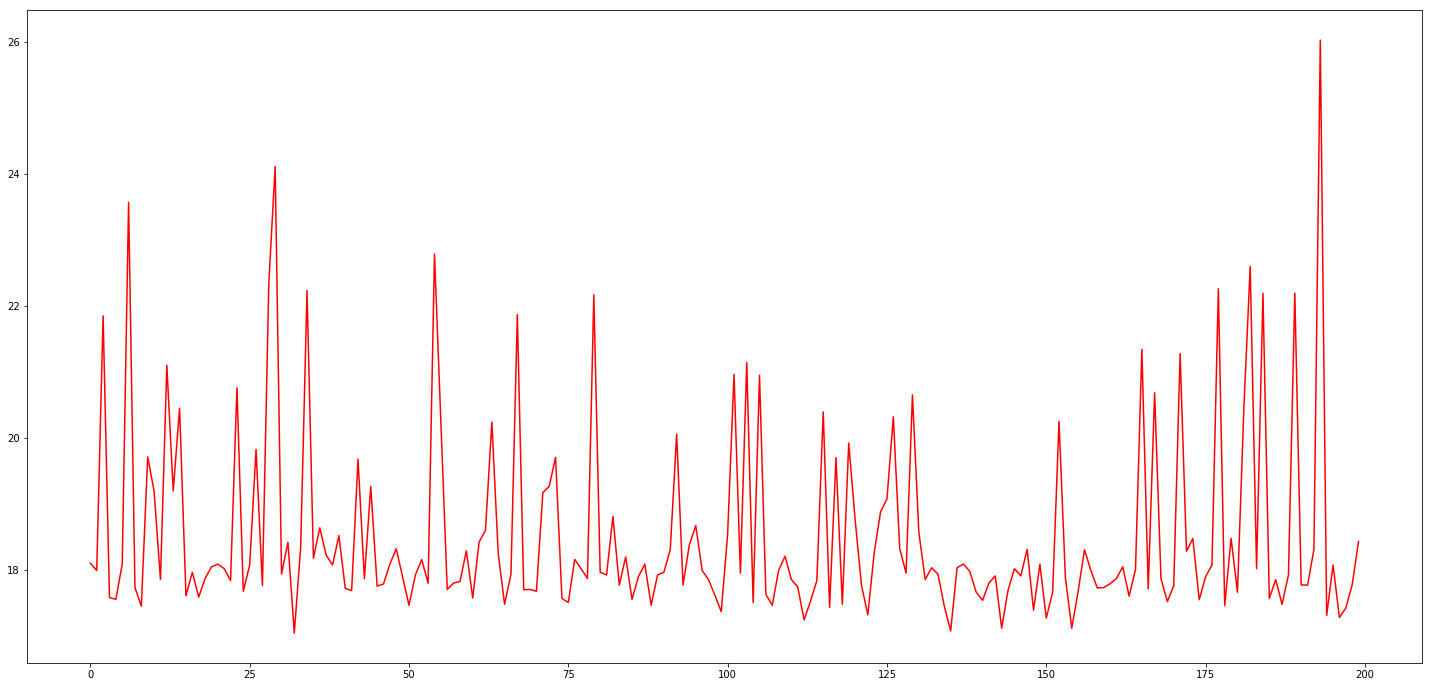

In [14]:
plt.figure(figsize=(25,12))
plt.plot(test_y,c='red')
plt.plot(rf_reg.predict(test),c='blue')
plt.show()

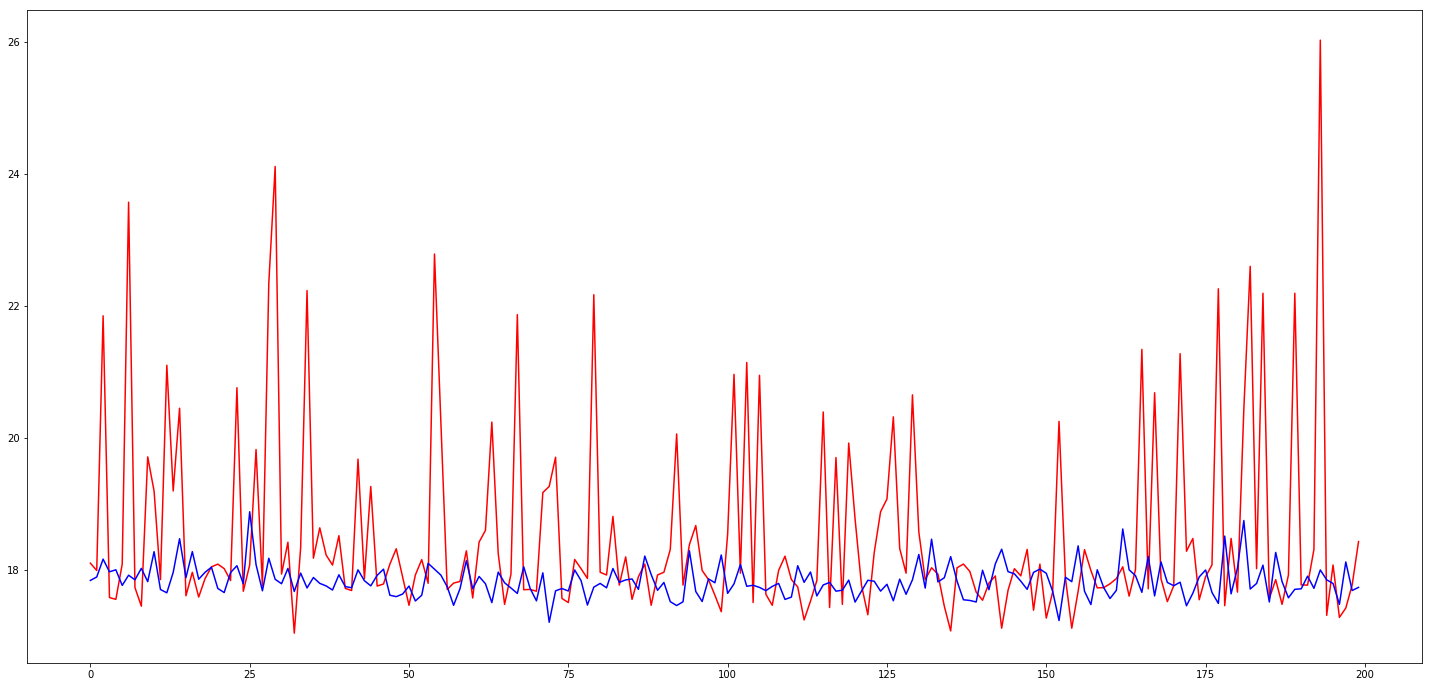

In [15]:
plt.figure(figsize=(25,12))
plt.plot(test_y,c='red')
plt.plot(rf_reg_2.predict(test),c='blue')
plt.show()